# Challenge 2

### Initial datalog code

In [ ]:
# (declare-rel inv (Int Int))
# (declare-var x0 Int)
# (declare-var x1 Int)
# (declare-var y0 Int)
# (declare-var y1 Int)

# (declare-rel fail ())

# (rule (=> (and (= x0 0) (= y0 0))
#     (inv x0 y0)))

# (rule (=> (and
#         (inv x0 y0)
#         (= x1 (+ x0 1))
#         (= y1 (ite (= (mod x0 2) 0) (+ y0 1) y0)))
#     (inv x1 y1)))

# (rule (=> (and (inv x0 y0) (= x0 (* 2 1351235))
#     (not (= y0 1351235))) fail))

# (query fail)

### Solve

In [2]:
from z3 import *
from spacer_tutorial import *

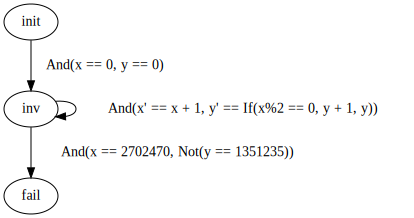

In [6]:
def mk_cfa2():
    A = CFA('prog')
    x, x_out = A.add_var(z3.IntSort(), name='x')
    y, y_out = A.add_var(z3.IntSort(), name='y')
    A.set_entry_node('init')
    A.set_exit_node('fail')

    N = 1351235
    M = N*2
    A.add_edge('init', 'inv', z3.And(x == 0, y == 0))
    A.add_edge('inv', 'inv', z3.And(x_out == x + 1, y_out == z3.If(x % 2 == 0, y + 1, y)))
    A.add_assert('inv', z3.Implies(x == M, y == N))

    return A
cfa2 = mk_cfa2()
cfa2.to_dot()

#### In TR fn I provided additional condition x > 2y. It makes things work

In [11]:
def mk_challenge_2():
    T = Ts('Ts0')
    N = 1351235
    M = N * 2
    x, x_out = T.add_var(z3.IntSort(), name='x')
    y, y_out = T.add_var(z3.IntSort(), name='y')
    T.Init = And(x == 0, y == 0)
    T.Tr = And(x >= 2*y, x_out == x + 1, y_out == If(x % 2 == 0, y + 1, y))
    T.Bad = And(x == M, Not(y == N))
    return T

In [12]:
ts_challenge_2 = mk_challenge_2()
HtmlStr(ts_challenge_2)

"Transition System: Ts0<br/>\tInit: And(x == 0, y == 0)<br/>\tBad: And(x == 2702470, Not(y == 1351235))<br/>\tTr: And(x >= 2*y, x' == x + 1, y' == If(x%2 == 0, y + 1, y))"

In [13]:
def vc_challenge_2(T):
    Inv = z3.Function('Inv', *(T.sig() + [z3.BoolSort()]))

    InvPre = Inv(*T.pre_vars())
    InvPost = Inv(*T.post_vars())

    all_vars = T.all()
    vc_init = z3.ForAll(all_vars, z3.Implies(T.Init, InvPre))
    vc_ind = z3.ForAll(all_vars, z3.Implies(z3.And(InvPre, T.Tr), InvPost))
    vc_bad = z3.ForAll(all_vars, z3.Implies(z3.And(InvPre, T.Bad), z3.BoolVal(False)))
    return [vc_init, vc_ind, vc_bad], InvPre

vc_challenge_2, inv_challenge_2 = vc_challenge_2(ts_challenge_2)
res_challenge_2, answer_challenge_2 = solve_horn(vc_challenge_2)
res_challenge_2


sat

### Answer

In [14]:
answer_challenge_2.eval(inv_challenge_2)

And(Or(Not(x%2 >= 1), Not(x + -2*y >= 0)),
    Not(y >= 1351235),
    Not(x + -2*y >= 1),
    Not(x >= 2702468))